In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import scipy.cluster. hierarchy as shc

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [5]:
dt=pd.read_csv('Kmeanssalry.csv')
dt

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,150000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [7]:
scaler=MinMaxScaler()

scaler.fit(dt[['Age']])

dt['Age']=scaler.transform(dt[['Age']])

scaler.fit(dt[['Income']])

dt['Income']=scaler.transform(dt[['Income']])
dt

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436
5,0.764706,0.897436
6,0.882353,0.982906
7,0.705882,1.000000
8,0.588235,0.948718
9,0.529412,0.726496


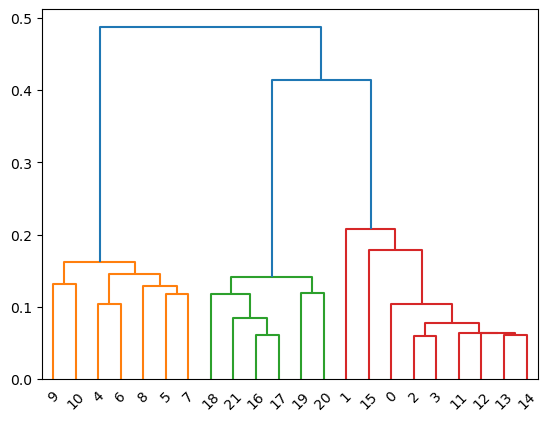

In [9]:
dnd=shc.dendrogram(shc.linkage(dt,method="single"))
plt.show()

In [13]:
Am=AgglomerativeClustering(n_clusters=3,linkage="single")
dt['ypred']=Am. fit_predict(dt)

In [14]:
k=Am.fit_predict(dt)

k #lable for all ages.



array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [15]:
dt

,Age,Income,ypred
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.897436,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


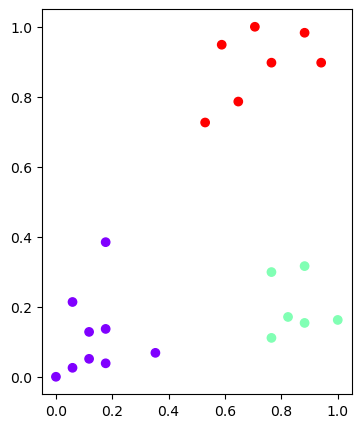

In [16]:
plt.figure(figsize=(4,5))
plt.scatter(dt.iloc[:,0],dt.iloc[:,1],c=Am.labels_,cmap="rainbow")

In [17]:
slht=silhouette_score(dt,dt['ypred'])

In [18]:
print(slht)

0.8437701844566381
